In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import seaborn as sns
import spacy
from spacy.matcher import Matcher

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [16]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [17]:
list(train[train['target']==0]['text'])[4]

'What a goooooooaaaaaal!!!!!!'

In [18]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
train[~train.keyword.isnull()].tail()

,id,keyword,location,text,target
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0


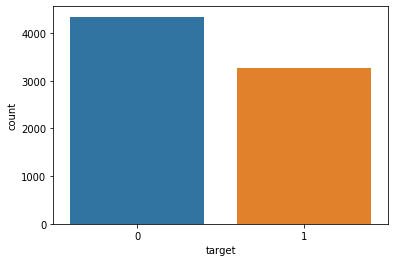

In [10]:
sns.countplot(data = train, x = "target")

## LET ANALYSE TWEETS KEYWORDS TO SEE IF THEY ARE USEFUL

### Word Cloud of Keywords in the train dataset(based on Frequency)

#### Disaster Tweets (Target ==1)

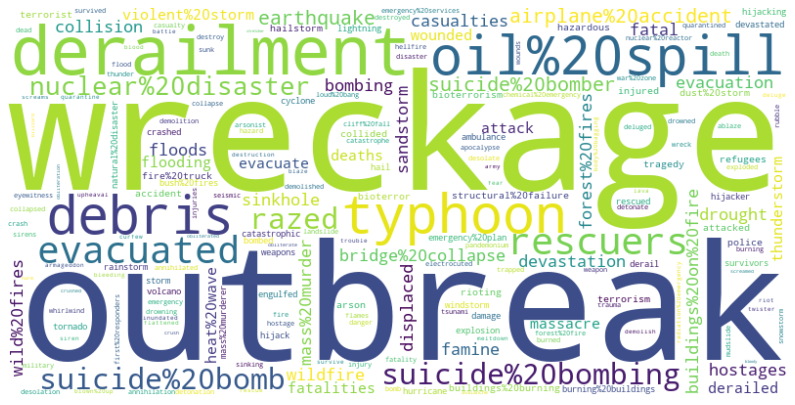

In [15]:
text1 = dict(train[train.target==1].keyword.value_counts())
wordcloud = WordCloud(width=800, height=400,background_color="white").generate_from_frequencies(text1)
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Disaster Tweets (Target == 0)

## Sample Testing Data

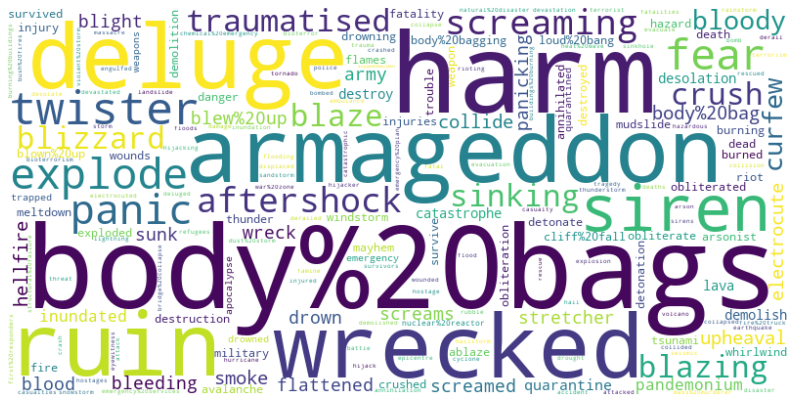

In [16]:
text2 = dict(train[train.target==0].keyword.value_counts())
wordcloud = WordCloud(width=800, height=400,background_color="white").generate_from_frequencies(text2)
plt.figure(figsize=[14,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Word Cloud of Keywords in the test dataset (based on Frequency)

# MODEL BASELINE

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [22]:
# For CV 

X = train.text

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=122)

### Tokenizer

In [23]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [24]:
train_vectors = count_vectorizer.fit_transform(X_train)
test_vectors = count_vectorizer.transform(X_test)

In [25]:
train_vectors.shape
test_vectors.shape

(2284, 16800)

In [ ]:
train_vectors.shape
test_vectors.shape

In [26]:
X_train[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [27]:
train_vectors[0]

<1x16800 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

### TF_IDF

In [28]:
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_vectors)
test_tfidf = tfidf_transformer.fit_transform(test_vectors)

### Naive Bayes

In [29]:
model =  MultinomialNB().fit(train_tfidf, y_train)

In [30]:
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_vectors)
test_tfidf = tfidf_transformer.fit_transform(test_vectors)

In [31]:
y_pred = model.predict(test_tfidf)

In [32]:
f1_score(y_test, y_pred, average='micro')

0.7854640980735552

In [33]:
confusion_matrix(y_test, y_pred)

array([[1189,   89],
       [ 401,  605]], dtype=int64)

### SVM

In [34]:
model_svm = SVC(gamma='scale').fit(train_tfidf, y_train)

In [35]:
y_pred = model_svm.predict(test_tfidf)

In [36]:
f1_score(y_test, y_pred, average='micro')

0.7837127845884413

In [37]:
confusion_matrix(y_test, y_pred)

array([[1127,  151],
       [ 343,  663]], dtype=int64)

In [38]:
test_vectors_og = count_vectorizer.transform(test.text)
test_tfidf_og = tfidf_transformer.fit_transform(test_vectors_og)

In [ ]:
### K-Fold

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),]

In [41]:
clf=LogisticRegression(random_state=0).fit(train_tfidf,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
y_pred = clf.predict(test_tfidf)

In [43]:
f1_score(y_test, y_pred, average='micro')

0.7745183887915937

In [44]:
confusion_matrix(y_test, y_pred)

array([[1084,  194],
       [ 321,  685]], dtype=int64)

### Decision Tree

In [45]:
y_train

7160    0
2126    0
6730    1
2339    0
5507    1
       ..
5392    0
6974    0
7500    1
4022    1
2442    1
Name: target, Length: 5329, dtype: int64

In [49]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(train_tfidf, y_train)
y_pred = clf.predict(test_tfidf)


In [50]:
f1_score(y_test, y_pred, average='micro')

0.7084063047285463

In [51]:
confusion_matrix(y_test, y_pred)

array([[958, 320],
       [346, 660]], dtype=int64)

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [56]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_tfidf, y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
y_pred = clf.predict(test_tfidf)

In [58]:
f1_score(y_test, y_pred, average='micro')

0.5678633975481612

In [59]:
confusion_matrix(y_test, y_pred)

array([[1278,    0],
       [ 987,   19]], dtype=int64)

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(train_tfidf, y_train)
y_pred = clf.predict(test_tfidf)
clf.score(test_tfidf,y_pred)

1.0

In [68]:
f1_score(y_test, y_pred, average='micro')

0.7408056042031523

In [69]:
confusion_matrix(y_test, y_pred)

array([[1076,  202],
       [ 390,  616]], dtype=int64)

# Learning BERT for the first time

In [70]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer

import tokenization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Any results you write to the current directory are saved as output.

In [71]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [72]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

b'C:\\Users\\asus\\AppData\\Local\\Temp\\tfhub_modules\\03d6fb3ce1605ad9e5e9ed5346b2fb9623ef4d3d\\assets\\vocab.txt'

## BILSTM

In [75]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer, PorterStemmer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import  (Dense,
                           Flatten,
                           Embedding,
                           LSTM,
                           ConvLSTM2D,
                           SpatialDropout1D,
                           Bidirectional,
                           Dropout,
                           Conv1D,
                           MaxPooling1D,
                           TimeDistributed)
            
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras

Using TensorFlow backend.


In [78]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('../test.csv')
submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

FileNotFoundError: [Errno 2] File b'../input/nlp-getting-started/train.csv' does not exist: b'../input/nlp-getting-started/train.csv'

In [79]:
def stopWords(tweet):  
    stop_words, toker = stopwords.words('english'), TweetTokenizer()
    words_tokens = toker.tokenize(tweet)
    return " ".join([word for word in  words_tokens if not word in stop_words])

def remove_pontucations(text):
    tokenizer_dots = RegexpTokenizer(r'\w+')
    return " ".join(tokenizer_dots.tokenize(text))

In [80]:
data_train.text = data_train.text.apply(lambda x: x.lower()) #transforma tetxo em minúsculo
data_train.text = data_train.text.apply(lambda x: x.strip()) #deleta excesso de espaços

data_train.text = data_train.text.apply(lambda x: sub(r'\d+', '', x)) #deleta números
data_train.text = data_train.text.apply(lambda x: remove_pontucations(x)) #remove pontuações e caracteres especiais
data_train.text = data_train.text.apply(lambda x: stopWords(x))

NameError: name 'data_train' is not defined